#### Hyundai Car Price

In [54]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [29]:
train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='test')

In [30]:
train_df

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...,...
66,3802,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
67,1270,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
68,2430,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
69,2870,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동


In [34]:
train_df.isna().sum(), test_df.isna().sum()

(가격       0
 년식       0
 종류       0
 연비       0
 마력       0
 토크       0
 연료       0
 하이브리드    0
 배기량      0
 중량       0
 변속기      0
 dtype: int64,
 가격       0
 년식       0
 종류       0
 연비       0
 마력       0
 토크       0
 연료       0
 하이브리드    0
 배기량      0
 중량       0
 변속기      0
 dtype: int64)

In [31]:
x_train_df = train_df.drop(['가격'], axis=1)
x_test_df = test_df.drop(['가격'], axis=1)
y_train_df = train_df['가격']
y_test_df = test_df['가격']

In [32]:
x_train_df.head()

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동


In [40]:
# dummy 변수화와 유사 기능, Onehot Encoding
# dummy 변수는 그대로 유지하되 사이에 끼움
transformer = make_column_transformer(
    (OneHotEncoder(), ['종류', '연료', '변속기']),
    remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['종류', '연료', '변속기'])])

In [42]:
transformer.fit(x_train_df)
x_train = transformer.transform(x_train_df)
x_train[0]

x_test = transformer.transform(x_test_df)

##### 정규화

In [46]:
import numpy as np
np.mean(x_train)

372.99665492957746

In [49]:
def norm(x):
  return (x - np.mean(x_train)) / np.std(x_train)
normed_train_data = norm(x_train)
normed_test_data = norm(x_test)

In [53]:
np.shape(x_train)

(71, 16)

In [95]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[16]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [96]:
model = build_model()

In [97]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.395],
       [0.373],
       [0.376],
       [0.388],
       [0.345],
       [0.371],
       [0.373],
       [0.376],
       [0.382],
       [0.376]], dtype=float32)

In [57]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, y_train_df,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [58]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,416225.21875,513.125916,416225.21875,2429782.75,767.886597,2429782.75,995
996,414452.84375,511.633972,414452.84375,2422122.50,765.623840,2422122.50,996
997,414368.00000,511.551544,414368.00000,2414525.00,763.467896,2414525.00,997
998,413902.53125,511.252411,413902.53125,2410809.50,762.572571,2410809.50,998
999,420297.96875,515.020569,420297.96875,2416214.75,764.551025,2416214.75,999


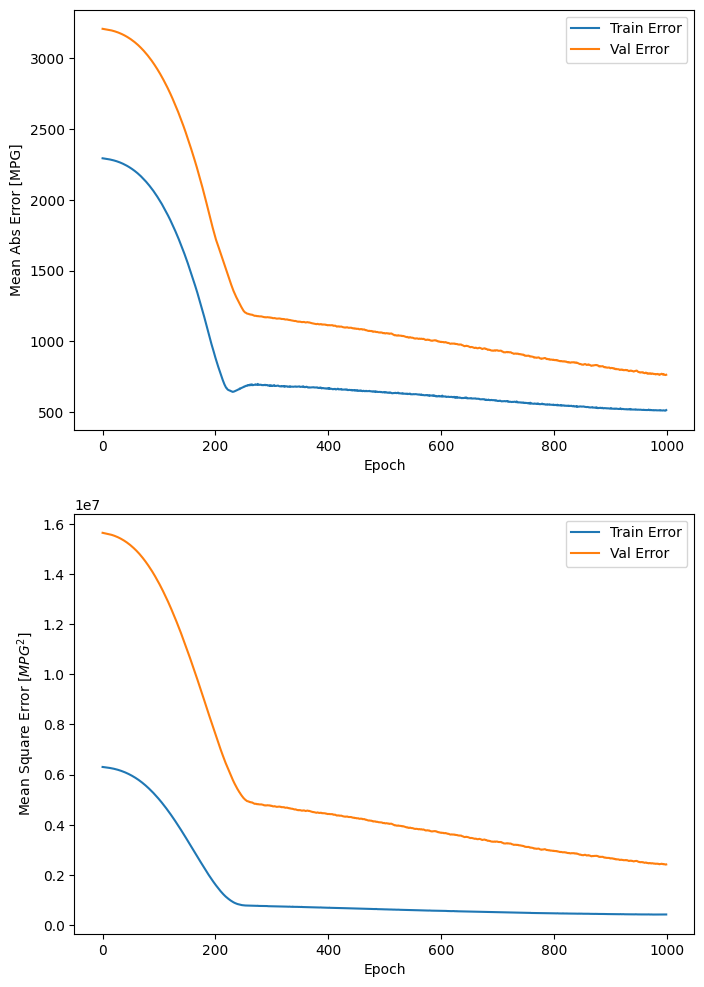

In [61]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  # plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  # plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..............................................

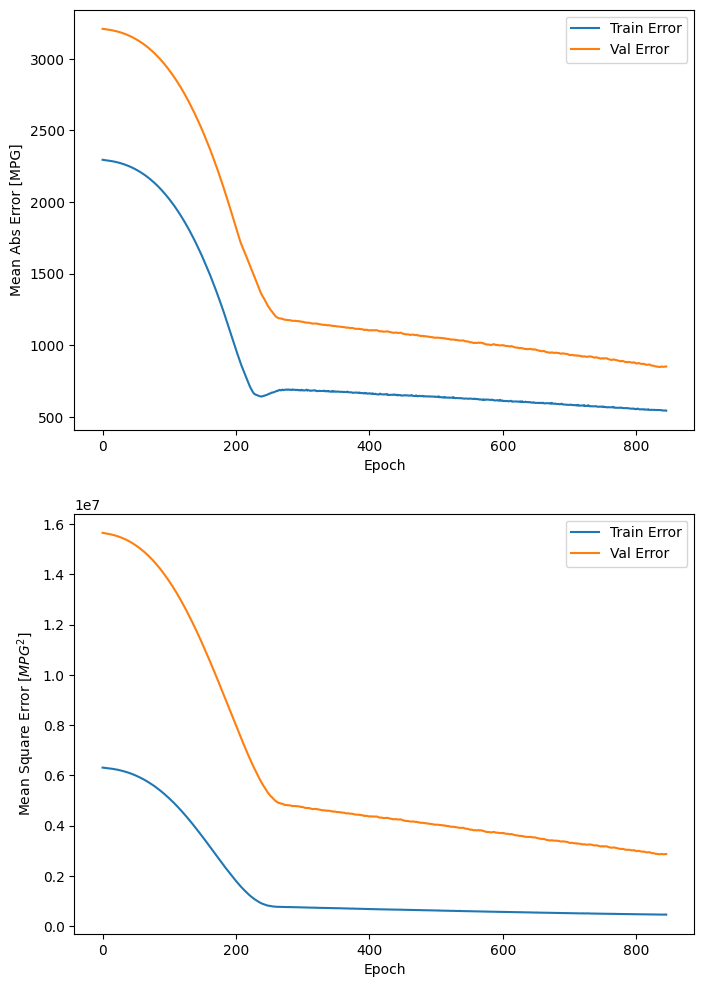

In [62]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, y_train_df, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [64]:
loss, mae, mse = model.evaluate(normed_test_data, y_test_df, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

1/1 - 0s - loss: 3567153.5000 - mae: 807.3669 - mse: 3567153.5000 - 16ms/epoch - 16ms/step
테스트 세트의 평균 절대 오차: 807.37 MPG


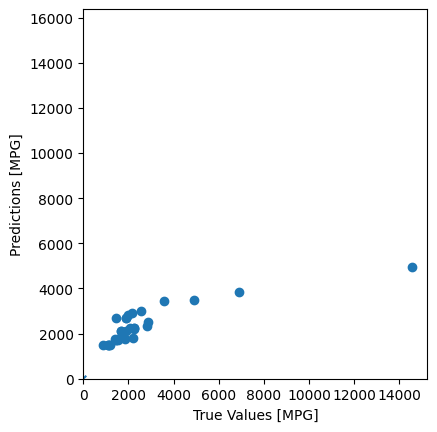

In [65]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(y_test_df, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

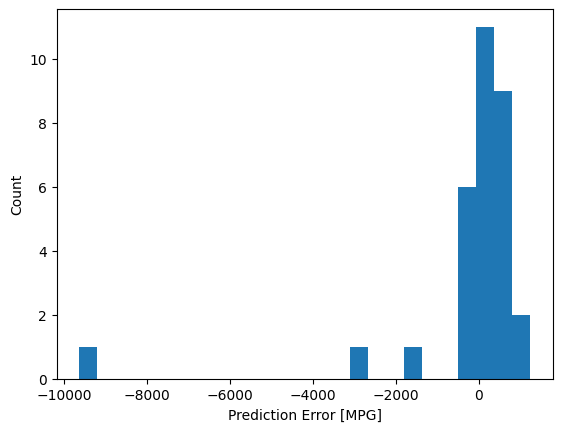

In [66]:
error = test_predictions - y_test_df
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

### CAR_MPG

In [1]:
# 메모리내 변수 제거

all = [var for var in globals() if var[0] != "_"]   # globals() 목록의 첫글자가 _ 로 시작하지 않는 자료의 리스트만 가져와서
for var in all:
    del globals()[var]

In [2]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\user\\.keras\\datasets\\auto-mpg.data'

In [4]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [6]:
dataset.isnull().sum()
dataset = dataset.dropna()

In [7]:
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [8]:
X=dataset.iloc[:, 1:] 
y=dataset.iloc[:,0]  # MPG

print(X.head())
print(y.head())

   Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  USA  \
0          8         307.0       130.0  3504.0          12.0          70  1.0   
1          8         350.0       165.0  3693.0          11.5          70  1.0   
2          8         318.0       150.0  3436.0          11.0          70  1.0   
3          8         304.0       150.0  3433.0          12.0          70  1.0   
4          8         302.0       140.0  3449.0          10.5          70  1.0   

   Europe  Japan  
0     0.0    0.0  
1     0.0    0.0  
2     0.0    0.0  
3     0.0    0.0  
4     0.0    0.0  
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: MPG, dtype: float64


#### 모델 제작

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

# X_train, X_test, y_train, y_test 의 순서에 유의해주세요
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 150 개중 *75%는  train.

np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test)

((313, 9), (313,), (79, 9), (79,))

In [10]:
train_stats = X_train.describe()
# train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,313.0,5.447284,1.690263,3.0,4.0,4.0,8.0,8.0
Displacement,313.0,192.787540,103.201153,68.0,105.0,151.0,260.0,455.0
Horsepower,313.0,104.009585,37.915348,46.0,78.0,95.0,120.0,230.0
Weight,313.0,2972.255591,841.134947,1613.0,2230.0,2815.0,3574.0,5140.0
Acceleration,313.0,15.560383,2.785476,8.0,13.6,15.5,17.0,24.8
Model Year,313.0,76.070288,3.660449,70.0,73.0,76.0,79.0,82.0
USA,313.0,0.623003,0.485410,0.0,0.0,1.0,1.0,1.0
Europe,313.0,0.169329,0.375643,0.0,0.0,0.0,0.0,1.0
Japan,313.0,0.207668,0.406287,0.0,0.0,0.0,0.0,1.0


In [11]:
### Standard Scailer

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(X_train)
normed_test_data = norm(X_test)

In [12]:
len(X_train.keys())

9

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 설정
model = Sequential()
model.add(Dense(64,  input_dim=9, activation='relu')) 
model.add(Dense(64,  activation='relu')) 
model.add(Dense(1)) 
#model.summary()

# 모델 컴파일
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [14]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.27567518],
       [-0.09360443],
       [-0.1226144 ],
       [ 0.01213648],
       [-0.05593777],
       [ 0.06516856],
       [-0.17390367],
       [-0.14987679],
       [-0.34530756],
       [-0.40497828]], dtype=float32)

In [15]:

# 에포크당 w,b를 레이어층에 맞추어서 저장
# modelpath는 폴더없으면 생성됨
from tensorflow.keras.callbacks import ModelCheckpoint
modelpath="c:/data/model/MPG/{epoch:02d}-{val_mse:.4f}-{val_mae:.4f}.hdf15"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1) #verbose기본값이 0임, 1을 지정하지 않으면 결과가 화면에 출력되지 않음


# 모델 실행
# 전체112개(150개중75%의)의 데이터셋, 배치5 총 (112/5)=> 23회의 배치작업이 이루어짐. 배치23회*에포크80회=총 1840회의 optimizer='adam'작업이 이루어짐
# 배치에서는 w,b갱신만하고 총배치가 다끝나는 1에포크에서 생성된 w,b값을  validation_data에 넣어서 확인함
history=model.fit(normed_train_data, y_train, 
                  epochs=80, 
                  #batch_size=5, 
                  validation_data=(X_test, y_test),
                  callbacks=[checkpointer],
                  verbose=0)   #verbose는 기본값이 1임,  옵션값을 넣지 않으면 출력물이 화면에 보이고, verbose를 0으로 하면 출력물이 보이지 않음


Epoch 1: saving model to c:/data/model/MPG\01-1552910.6250-1191.3174.hdf15
INFO:tensorflow:Assets written to: c:/data/model/MPG\01-1552910.6250-1191.3174.hdf15\assets

Epoch 2: saving model to c:/data/model/MPG\02-4622457.5000-2058.3137.hdf15
INFO:tensorflow:Assets written to: c:/data/model/MPG\02-4622457.5000-2058.3137.hdf15\assets

Epoch 3: saving model to c:/data/model/MPG\03-10203130.0000-3059.1006.hdf15
INFO:tensorflow:Assets written to: c:/data/model/MPG\03-10203130.0000-3059.1006.hdf15\assets

Epoch 4: saving model to c:/data/model/MPG\04-18739238.0000-4147.3887.hdf15
INFO:tensorflow:Assets written to: c:/data/model/MPG\04-18739238.0000-4147.3887.hdf15\assets

Epoch 5: saving model to c:/data/model/MPG\05-29820028.0000-5230.6577.hdf15
INFO:tensorflow:Assets written to: c:/data/model/MPG\05-29820028.0000-5230.6577.hdf15\assets

Epoch 6: saving model to c:/data/model/MPG\06-42887556.0000-6274.8281.hdf15
INFO:tensorflow:Assets written to: c:/data/model/MPG\06-42887556.0000-6274.82

In [16]:
hist_df=pd.DataFrame(history.history)
hist_df.head()

,loss,mae,mse,val_loss,val_mae,val_mse
0,585.877380,22.901640,585.877380,1.552911e+06,1191.317383,1.552911e+06
1,530.045593,21.634926,530.045593,4.622458e+06,2058.313721,4.622458e+06
2,472.632538,20.260344,472.632538,1.020313e+07,3059.100586,1.020313e+07
3,407.783020,18.611734,407.783020,1.873924e+07,4147.388672,1.873924e+07
4,337.010223,16.673826,337.010223,2.982003e+07,5230.657715,2.982003e+07


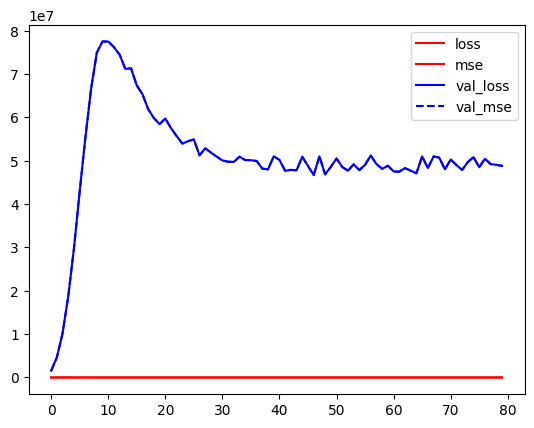

In [17]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
plt.plot(hist_df['loss'],'-r',label='loss')
plt.plot(hist_df['mse'],'r',label='mse')
plt.plot(hist_df['val_loss'],'-b',label='val_loss')
plt.plot(hist_df['val_mse'],'--b',label='val_mse')
plt.legend()

In [18]:
# # y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
# y_vloss=hist_df['val_loss']

# # y_loss에 학습셋의 오차를 저장합니다.
# y_loss=hist_df['loss']

# # x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
# plt.plot(hist_df['loss'],'r',label='loss')
# plt.plot(hist_df['accuracy'],'r',label='acc')
# plt.plot(hist_df['val_loss'],'--b',label='val_loss')
# plt.plot(hist_df['val_accuracy'],'--b',label='val_acc')
# plt.legend()

In [19]:
score=model.evaluate(X_test, y_test)   
score # 0번은 loss, 1번은 acc

3/3 [==============================] - 0s 2ms/step - loss: 48798248.0000 - mae: 6717.7524 - mse: 48798248.0000


[48798248.0, 6717.75244140625, 48798248.0]

### Abalone

In [20]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [21]:
df1 = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

df1.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [22]:
df1.isnull().sum()

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [23]:
X=df1.iloc[:, :7] 
y=df1.iloc[:,7]

print(X.head())
print(y.head())

   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.435     0.335   0.110         0.334          0.1355          0.0775   
1   0.585     0.450   0.125         0.874          0.3545          0.2075   
2   0.655     0.510   0.160         1.092          0.3960          0.2825   
3   0.545     0.425   0.125         0.768          0.2940          0.1495   
4   0.545     0.420   0.130         0.879          0.3740          0.1695   

   Shell weight  
0        0.0965  
1        0.2250  
2        0.3700  
3        0.2600  
4        0.2300  
0     7
1     6
2    14
3    16
4    13
Name: Age, dtype: int64


In [24]:
from sklearn.model_selection import train_test_split
import numpy as np

# X_train, X_test, y_train, y_test 의 순서에 유의해주세요
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=777)  # 150 개중 *75%는  train.

np.shape(X_train), np.shape(y_train), np.shape(X_test), np

((2490, 7),
 (2490,),
 (830, 7),
 <module 'numpy' from 'c:\\Users\\user\\miniconda3\\envs\\gpu\\lib\\site-packages\\numpy\\__init__.py'>)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 설정
model = Sequential()
model.add(Dense(12,  input_dim=7, activation='relu')) # x값이4개 w(4)+b(1)=5개파람 *  12개=>60개
# model.add(Dense(8,  activation='relu'))  # x값이 12개  w(12)+b(1)=13개파람 * 8개=104개
model.add(Dense(3)) # x값이 8개 w(8)+b(1)=9개파람 * 3개=27개
#model.summary()

# 모델 컴파일
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


# 에포크당 w,b를 레이어층에 맞추어서 저장
# modelpath는 폴더없으면 생성됨
from tensorflow.keras.callbacks import ModelCheckpoint
modelpath="c:/data/model/abalone/{epoch:02d}-{val_accuracy:.4f}.hdf15"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1) #verbose기본값이 0임, 1을 지정하지 않으면 결과가 화면에 출력되지 않음


# 모델 실행
# 전체112개(150개중75%의)의 데이터셋, 배치5 총 (112/5)=> 23회의 배치작업이 이루어짐. 배치23회*에포크80회=총 1840회의 optimizer='adam'작업이 이루어짐
# 배치에서는 w,b갱신만하고 총배치가 다끝나는 1에포크에서 생성된 w,b값을  validation_data에 넣어서 확인함
history=model.fit(X_train, y_train, 
                  epochs=80, 
                  batch_size=5, 
                  validation_data=(X_test, y_test),
                  callbacks=[checkpointer],
                  verbose=0)   #verbose는 기본값이 1임,  옵션


Epoch 1: saving model to c:/data/model/abalone\01-0.0000.hdf15
INFO:tensorflow:Assets written to: c:/data/model/abalone\01-0.0000.hdf15\assets

Epoch 2: saving model to c:/data/model/abalone\02-0.0000.hdf15
INFO:tensorflow:Assets written to: c:/data/model/abalone\02-0.0000.hdf15\assets

Epoch 3: saving model to c:/data/model/abalone\03-0.0000.hdf15
INFO:tensorflow:Assets written to: c:/data/model/abalone\03-0.0000.hdf15\assets

Epoch 4: saving model to c:/data/model/abalone\04-0.0000.hdf15
INFO:tensorflow:Assets written to: c:/data/model/abalone\04-0.0000.hdf15\assets

Epoch 5: saving model to c:/data/model/abalone\05-0.0000.hdf15
INFO:tensorflow:Assets written to: c:/data/model/abalone\05-0.0000.hdf15\assets

Epoch 6: saving model to c:/data/model/abalone\06-0.0000.hdf15
INFO:tensorflow:Assets written to: c:/data/model/abalone\06-0.0000.hdf15\assets

Epoch 7: saving model to c:/data/model/abalone\07-0.0000.hdf15
INFO:tensorflow:Assets written to: c:/data/model/abalone\07-0.0000.hdf15